# A finite difference scheme solving a coupled MHD system
In this notebook, we will use the finite difference scheme to solve the following scalar MHD system:
$u_t + uu_t - bb_t = \nu u_{xx},$
$b_t + ub_x - bu_x = \lambda b_{xx}.$

In the entire simulation, We will assume that $\lambda = \nu/100$. And we will use several different initial data to yield the numerical results.


In [117]:
# In this cell, we settle the finite difference scheme. 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def func_triple(f):
    m = int(f.shape[0] - 1)
    n = int(3*m +1)
    F = np.zeros(n)
    
    for i in range(m):
        F[i] = F[i + m] = F[i+2*m] = f[i]
    
    F[n-1] = f[m]
    
    return F


def func_trisec(f):
    m = f.shape[0]
    n = int((m-1)/3)
    F = np.zeros(n+1)
    
    for i in range(n+1):
        F[i] = f[i+n]
    
    return F
        

def MHD_solver(v, lbd, T, N1, N2, _f, _g):
    f = func_triple(_f)
    g = func_triple(_g)
    
    dx = 1/N1
    dt = T/N2

    r = dt/np.power(dx,2)
    s = dt/(2*dx)
    print("The von Neumann coefficient is " + str(v*r/2))
    
    u = np.zeros((N2+1, 3*N1+1))
    b = np.zeros((N2+1, 3*N1+1))
    U = np.zeros((N2+1, N1+1))
    B = np.zeros((N2+1, N1+1))
    u[0] = f
    b[0] = g
    
    for i in range(N2):
        for j in range(3*N1 + 1):
            mr = (j+1)%(3*N1)
            ml = (j-1)%(3*N1)
        
            a1 = u[i,mr] - 2*u[i,j]+u[i, ml]
            a2 = u[i,mr] - u[i,ml]
            b1 = b[i,mr] - 2*b[i,j]+b[i, ml]
            b2 = b[i,mr] - b[i,ml]
        
            u[i+1, j] = v * r * a1 + u[i,j] * (1-s*a2) + b[i,j] * s * b2
            b[i+1, j] = lbd * r * b1 + b[i,j] * (s*a2 + 1) - u[i,j] * s * b2
            
    for i in range(N2):
        U[i] = func_trisec(u[i])
        B[i] = func_trisec(b[i])
            
    return U, B

## Test 1: periodic $u_0$ with zero magnetic field: Burgers equation

This is a null test! We just want to check whether the scheme works.

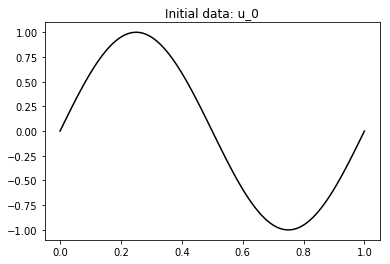

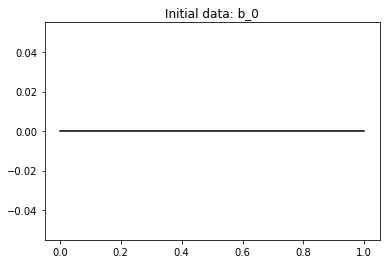

In [118]:
x = np.linspace(0, 1, num=N1+1)

f1 = np.sin(2*np.pi*x)
g1 = 0*x

#check the initial data
plt.plot(x, f1, "k-")
plt.title("Initial data: u_0")
plt.show()

plt.plot(x, g1, "k-")
plt.title("Initial data: b_0")
plt.show()

The von Neumann coefficient is 0.005


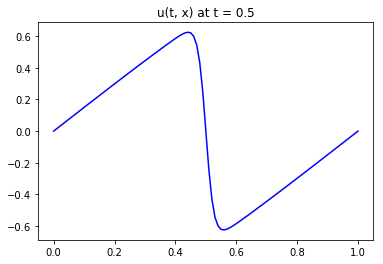

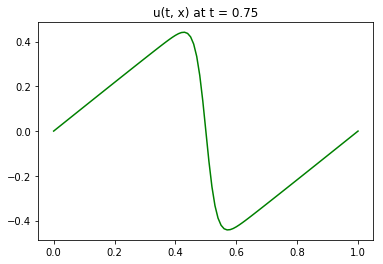

In [119]:
u1, b1 = MHD_solver(0.01, 0.01/100, 1, 100, 10000, f1, g1)

#plot the result
plt.plot(x, u1[5000], "b-")
plt.title("u(t, x) at t = 0.5")
plt.show()

plt.plot(x, u1[7500], "g-")
plt.title("u(t, x) at t = 0.75")
plt.show()

## Test 2: periodic $u_0$ and small $b_0$: the velocity field compensates the magnetic field.

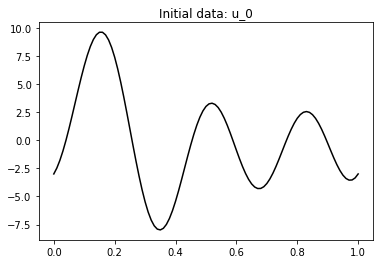

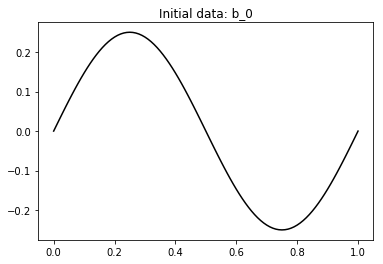

In [120]:
# The second test: 

f2 = np.sin(2*np.pi*x) + 2*np.cos(2*np.pi*x) + 3*np.sin(4*np.pi*x) - 5*np.cos(6*np.pi*x)
g2 = 0.25*np.sin(2*np.pi*x)

#check the initial data
plt.plot(x, f2, "k-")
plt.title("Initial data: u_0")
plt.show()

plt.plot(x, g2, "k-")
plt.title("Initial data: b_0")
plt.show()



The von Neumann coefficient is 0.05


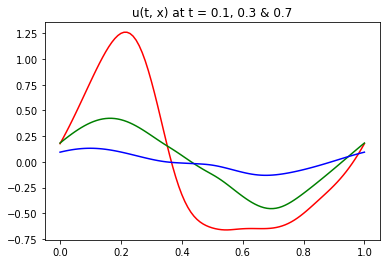

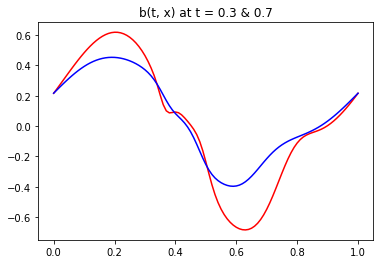

In [122]:
u2, b2 = MHD_solver(0.1, 0.1/100, 1, 100, 10000, f2, g2)

#plot the result
plt.plot(x, u2[1000], "r-")
plt.plot(x, u2[3000], "g-")
plt.plot(x, u2[7000], "b-")
plt.title("u(t, x) at t = 0.1, 0.3 & 0.7")
plt.show()

plt.plot(x, b2[3000], "r-")
plt.plot(x, b2[7000], "b-")
plt.title("b(t, x) at t = 0.3 & 0.7")
plt.show()

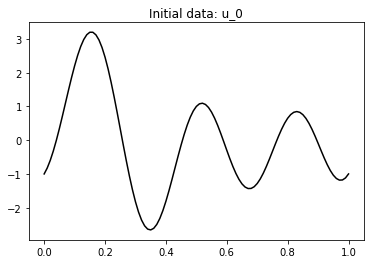

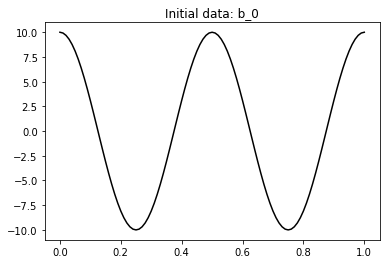

In [102]:
# The second test: periodic u_0 and b_0 (b_0 is larger than f_0)

f3 = (np.sin(2*np.pi*x) + 2*np.cos(2*np.pi*x) + 3*np.sin(4*np.pi*x) - 5*np.cos(6*np.pi*x))/3
g3 = 10*np.cos(4*np.pi*x)

#check the initial data
plt.plot(x, f3, "k-")
plt.title("Initial data: u_0")
plt.show()

plt.plot(x, g3, "k-")
plt.title("Initial data: b_0")
plt.show()

The von Neumann coefficient is 0.05


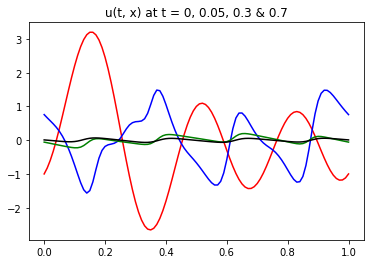

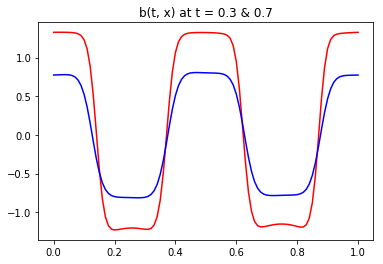

In [103]:
u3, b3 = MHD_solver(0.1, 0.1/100, 1, 100, 10000, f3, g3)

#plot the result
plt.plot(x, u3[0], "r-")
plt.plot(x, u3[500], "b-")
plt.plot(x, u3[3000], "g-")
plt.plot(x, u3[7000], "k-")
plt.title("u(t, x) at t = 0, 0.05, 0.3 & 0.7")
plt.show()

plt.plot(x, b3[3000], "r-")
plt.plot(x, b3[7000], "b-")
plt.title("b(t, x) at t = 0.3 & 0.7")
plt.show()

The von Neumann coefficient is 0.05


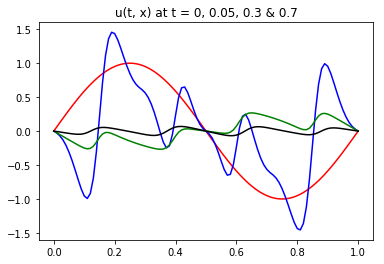

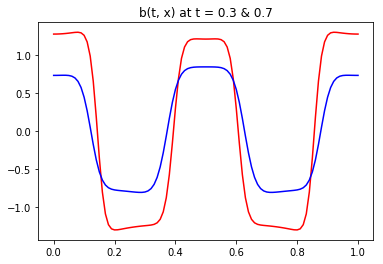

In [104]:
# Magnetic test: periodic simple u_0 and the same b_0 (b_0 is larger than f_0)

f4 = np.sin(2*np.pi*x)
g4 = 10*np.cos(4*np.pi*x)

u4, b4 = MHD_solver(0.1, 0.1/100, 1, 100, 10000, f4, g4)

#plot the result
plt.plot(x, u4[0], "r-")
plt.plot(x, u4[500], "b-")
plt.plot(x, u4[3000], "g-")
plt.plot(x, u4[7000], "k-")
plt.title("u(t, x) at t = 0, 0.05, 0.3 & 0.7")
plt.show()

plt.plot(x, b4[3000], "r-")
plt.plot(x, b4[7000], "b-")
plt.title("b(t, x) at t = 0.3 & 0.7")
plt.show()

# A micro-time study
We observe an interesting "activation" of the velocity field $u(t,x)$ during $0 \le t \le 0.1$. The next plot is to illustrate how the velocity is activated when time is close to 0.

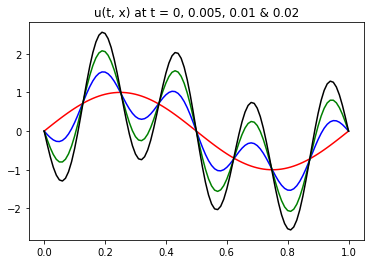

In [114]:
#plot the result
plt.plot(x, u4[0], "r-")
plt.plot(x, u4[10], "b-")
plt.plot(x, u4[20], "g-")
plt.plot(x, u4[30], "k-")
plt.title("u(t, x) at t = 0, 0.001, 0.002 & 0.003")
plt.show()

Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1026, in _start
    self._init_draw()
  File "/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1556, in _init_draw
    for artist in f:
TypeError: 'Line2D' object is not iterable


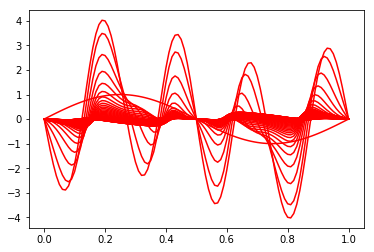

In [111]:
#animation

fig = plt.figure()

ls = [None]*100
for i in range(100):
    ls[i] = plt.plot(x, u4[100*i], color='r')
  
ani = animation.ArtistAnimation(fig, ln, interval=50)
plt.show()

In [110]:
a = [None]*2
print(a)

[None, None]
